What is Deep Learning?

Definition:
Deep Learning is a subset of Machine Learning that uses neural networks with multiple hidden layers to model complex patterns in data. These layers allow the model to learn hierarchical representations, from low-level features to high-level concepts.

**??** How Deep Learning Differs from Traditional ML

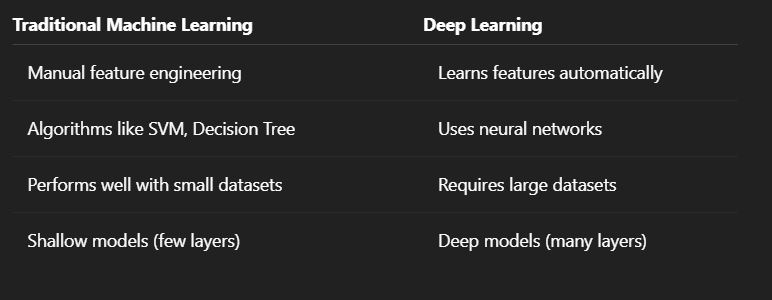

#Setting up your deep learning environment


Python setup with GPU support

Essential libraries:

TensorFlow/Keras for building models

NumPy, Matplotlib for basics

OpenCV for computer vision

NLTK/spaCy for text processing


# History of Deep Learning

Inventions Inspired by nature

Aeroplan

 brain’s architecture for inspiration on how to build an intelligent machine.

**After 2000s:**

-Now there is huge quantity of data available to train neural networks and ANN started outperform ML techniques

-Plus thanks to gaming community for producing powerful GPU cards

-And once ANNs got better it got attention of investors. Generous fundings came and amazing products start building.

**Biological Neurons**

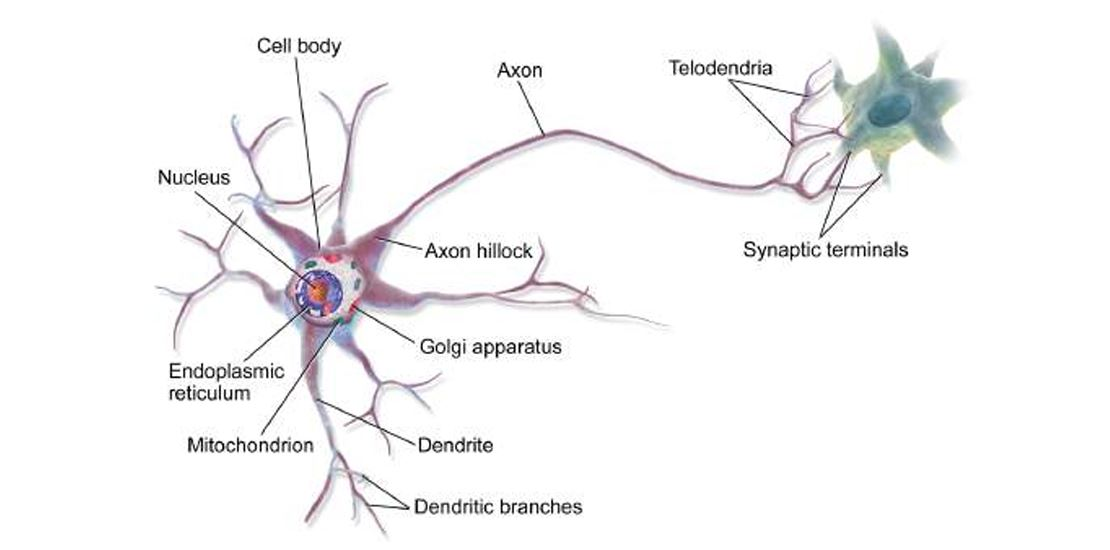

 The architecture of biological neural net
works (BNN) is still the subject of active research, but some parts of the brain have
 been mapped, and it seems that neurons are often organized in consecutive layers

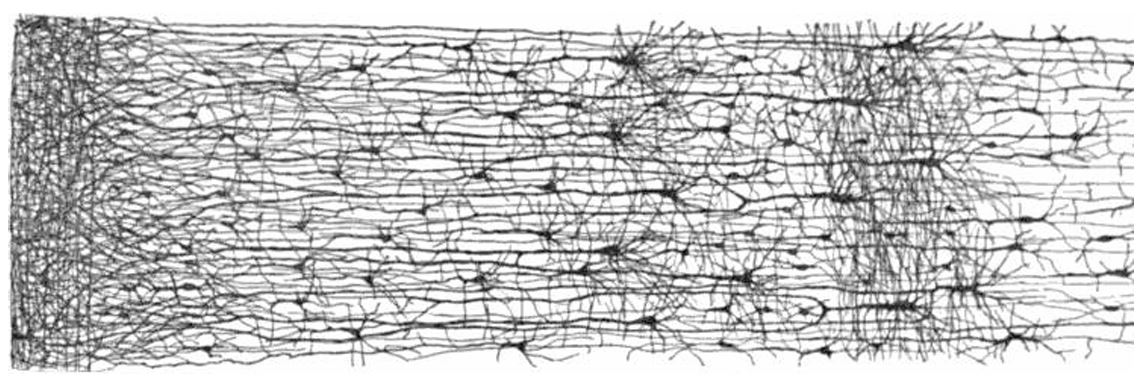

**Logical Computations with Neurons**

Warren McCulloch and Walter Pitts proposed a very simple model of the biological
 neuron, which later became known as an artificial neuron: it has one or more binary
 (on/off) inputs and one binary output. The artificial neuron simply activates its out
put when more than a certain number of its inputs are active. McCulloch and Pitts
 showed that even with such a simplified model it is possible to build a network of
 artificial neurons that computes any logical proposition you want. For example, let’s
 build a few ANNs that perform various logical computations (see Figure 10-3),
 assuming that a neuron is activated when at least two of its inputs are active.

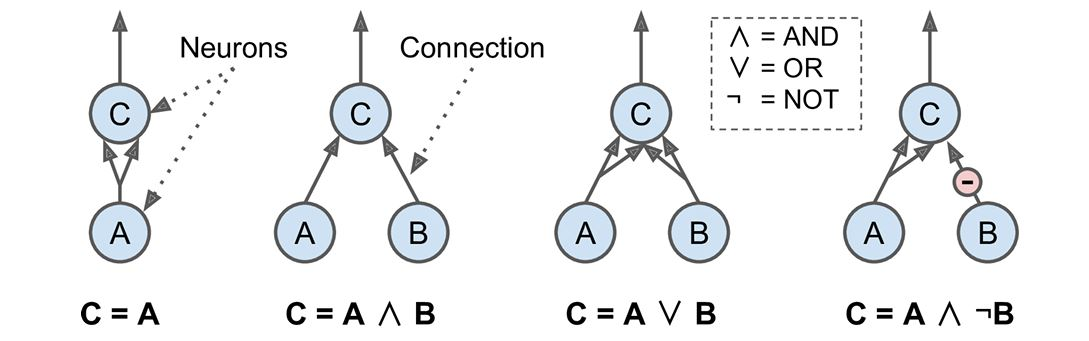

# The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank
Rosenblatt. It is based on a slightly different artificial neuron see Figure called
The name Perceptron is sometimes used to mean a tiny network with a single TLU.
a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs
and output are now numbers (instead of binary on/off values) and each input con‐
nection is associated with a weight. The TLU computes a weighted sum of its inputs
(z = w1 x1+ w2 x2 ......+ wn xn = x
T w), then applies a step function to that sum and
outputs the result: hw(x) = step(z), where z = x
T w.


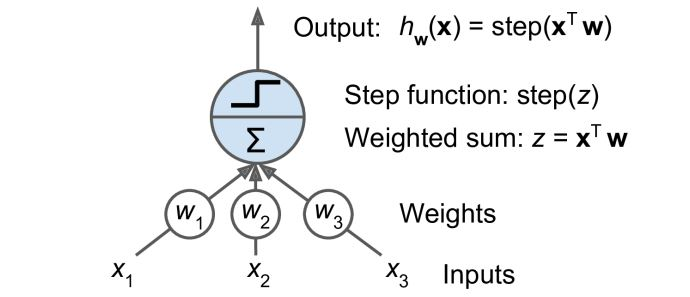

The most common step function used in Perceptrons is the Heaviside step function

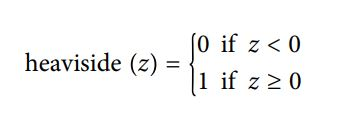

A single TLU can be used for simple linear binary classification. It computes a linear
combination of the inputs and if the result exceeds a threshold, it outputs the positive
class or else outputs the negative class.

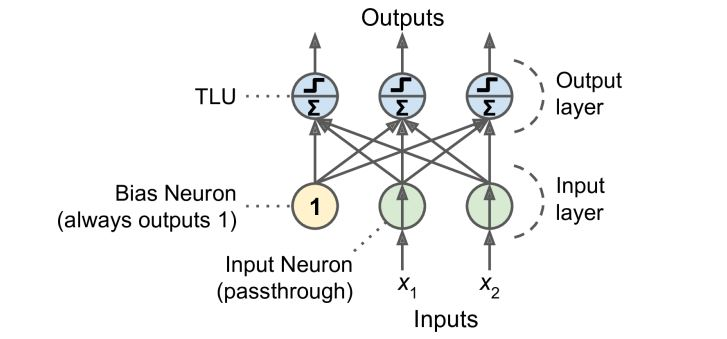

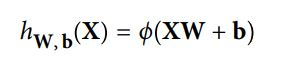

As always, X represents the matrix of input features. It has one row per instance,
one column per feature.

• The weight matrix W contains all the connection weights except for the ones
from the bias neuron. It has one row per input neuron and one column per artifi‐
cial neuron in the layer.

• The bias vector b contains all the connection weights between the bias neuron
and the artificial neurons. It has one bias term per artificial neuron.

• The function ϕ is called the activation function: when the artificial neurons are
TLUs, it is a step function (but we will discuss other activation functions shortly)

So how is a Perceptron trained?

The Perceptron training algorithm proposed by
Frank Rosenblatt was largely inspired by Hebb’s rule. In his book The Organization of
Behavior, published in 1949, Donald Hebb suggested that when a biological neuron
often triggers another neuron, the connection between these two neurons grows
stronger. This idea was later summarized by Siegrid Löwel in this catchy phrase:
“Cells that fire together, wire together.” The
rule is shown in Equation

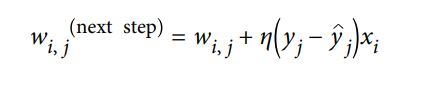

• wi, j
 is the connection weight between the i
th input neuron and the j
th output neu‐
ron.

• xi
 is the i
th input value of the current training instance.

• yj^ is the output of the j
th output neuron for the current training instance.

• yj
 is the target output of the j
th output neuron for the current training instance.

• η is the learning rate.

Purpose of training, calculate weights and bais value from data then make prdiciton on new instances using that data.

Epoch 1 => Weights: [ 0.1141771  -0.20972451], Bias: 0.1
Epoch 2 => Weights: [ 0.27079864 -0.33568518], Bias: 0.1
Epoch 3 => Weights: [ 0.33344725 -0.31469174], Bias: 0.1
Epoch 4 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 5 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 6 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 7 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 8 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 9 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Epoch 10 => Weights: [ 0.39609587 -0.29369829], Bias: 0.1
Final Accuracy: 100.00%


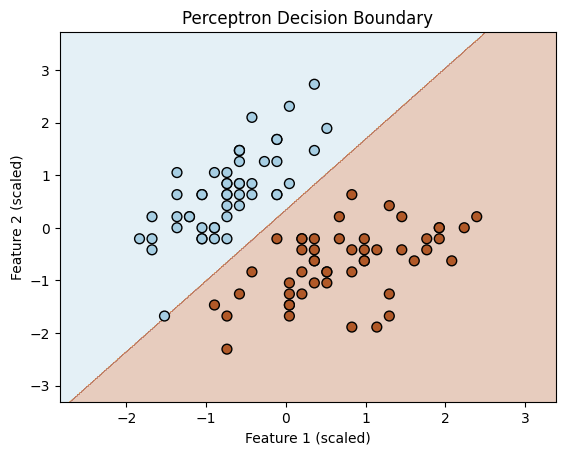

In [ ]:
# ===============================
# Perceptron Algorithm (Manual)
# ===============================

# Step 1: Import required libraries
import numpy as np                 # For mathematical operations
import matplotlib.pyplot as plt    # For plotting graphs
from sklearn import datasets       # For loading sample datasets
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Step 2: Load the Iris dataset
iris = datasets.load_iris()        # Load full iris dataset from sklearn
X = iris.data[:, :2]               # Select only first two features (Sepal length & Sepal width)
y = iris.target                    # Target labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Step 3: Keep only two classes for binary classification
# Here we take only class 0 (Setosa) and class 1 (Versicolor)
X = X[y < 2]                        # Keep rows where class label < 2
y = y[y < 2]                        # Keep corresponding labels

# Step 4: Scale features for better convergence
scaler = StandardScaler()           # Create StandardScaler object
X = scaler.fit_transform(X)         # Apply standardization: mean=0, std=1

# Step 5: Initialize perceptron parameters
epochs = 10                         # Number of passes over the dataset
learning_rate = 0.1                 # Step size for weight updates
n_samples, n_features = X.shape     # Number of samples & number of features
weights = np.zeros(n_features)      # Initialize weights with zeros
bias = 0                            # Initialize bias as 0

# Step 6: Define the step activation function
# This function outputs 1 if z >= 0 else 0
def step_function(z):
    return np.where(z >= 0, 1, 0)

# Step 7: Training loop
for epoch in range(epochs):         # Repeat for given number of epochs
    for i in range(n_samples):      # Loop through all training samples

        # Linear combination: z = w*x + b
        z = np.dot(X[i], weights) + bias

        # Prediction using step function
        y_pred = step_function(z)

        # Calculate error (actual - predicted)
        error = y[i] - y_pred

        # Update weights using perceptron learning rule
        weights += learning_rate * error * X[i]

        # Update bias
        bias += learning_rate * error

    # Print weights and bias after each epoch
    print(f"Epoch {epoch+1} => Weights: {weights}, Bias: {bias}")

# Step 8: Predictions after training
preds = step_function(np.dot(X, weights) + bias)  # Final predictions on training data
accuracy = np.mean(preds == y)                    # Calculate accuracy
print(f"Final Accuracy: {accuracy*100:.2f}%")     # Print accuracy percentage

# Step 9: Decision Boundary Visualization
# Create mesh grid for plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create grid for feature 1
                     np.arange(y_min, y_max, 0.01)) # Create grid for feature 2

# Flatten the grid and make predictions
grid = np.c_[xx.ravel(), yy.ravel()]
Z = step_function(np.dot(grid, weights) + bias)   # Predictions for each point in grid
Z = Z.reshape(xx.shape)                           # Reshape to match mesh grid

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)       # Fill decision regions
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Paired) # Plot data points
plt.title("Perceptron Decision Boundary")                   # Title of plot
plt.xlabel("Feature 1 (scaled)")                             # X-axis label
plt.ylabel("Feature 2 (scaled)")                             # Y-axis label
plt.show()                                                   # Show plot


In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
p= Perceptron()

In [ ]:
p.fit(X,y)

Perceptron()

In [ ]:
p.coef_

array([[ 2.34932306, -1.67947559]])

In [ ]:
p.intercept_

array([0.])

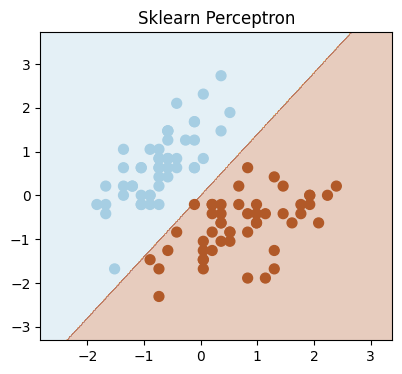

In [ ]:
# Predictions for plotting
Z_sklearn = p.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_sklearn, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.title("Sklearn Perceptron")

plt.show()